In [1]:
import gymnasium as gym
import os
import source.config as config
from source.algorithms import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import source.farm_env # Import necessary to register the gym environment

In [2]:
env = gym.make(id='FarmEnv-v0',
                initial_budget = config.INITIAL_BUDGET,
                sheep_cost = config.SHEEP_COST,
                wheat_cost = config.WHEAT_COST,
                wool_price = config.WOOL_PRICE,
                wheat_price = config.WHEAT_PRICE,
                max_years = config.MAX_YEARS,
                wool_fixed_cost = config.WOOL_FIXED_COST,
                storm_probability = config.STORM_PROBABILITY,
                incest_penalty = config.INCEST_PENALTY,
                reward_std = config.SIGMA
                )

In [3]:
def conv(a, win=100):
    return np.convolve(a, np.ones(win), mode='same') / win

In [4]:
learning_rate = 0.001
policy_learning_rate = 1e-4
value_learning_rate = 1e-4
n_episodes = 500_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes)  # reduce the exploration over time
final_epsilon = 0.1

REINFORCE_agent = FarmAgentNeuralREINFORCEAdvantage(
    environment=env, policy_learning_rate=policy_learning_rate, value_learning_rate=value_learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.999,
    # policy_net_weights_path='agent_models/policy_net_weights.pth', value_net_weights_path='agent_models/value_net_weights.pth'
)

MC_vfa_agent = FarmAgentMCVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.999
)

SARSA_vfa_agent = FarmAgentSarsaVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


# REINFORCE

In [5]:
nenv = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
final_budget_queue = []

for episode in tqdm(range(n_episodes)):
    REINFORCE_agent.update(episode_number=episode)
    REINFORCE_agent.decay_epsilon()
    final_budget_queue.append(nenv.unwrapped.budget)

    # Optionally, you can print some statistics every N episodes
    if episode % 10000 == 0:
        avg_budget = sum(final_budget_queue[-10000:]) / min(10000, len(final_budget_queue))
        print(f"Episode {episode}, Average Budget: {avg_budget:.2f}") #, Weights: {list(REINFORCE_agent.policy_net.parameters())}")

  0%|          | 0/500000 [00:00<?, ?it/s]

c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'float'>
  logger.warn(
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-jQWtjN-A-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs ret

Episode 0, Average Budget: 2.72


  2%|▏         | 10011/500000 [02:52<2:38:11, 51.63it/s]

Episode 10000, Average Budget: 1.73


  4%|▍         | 20026/500000 [04:02<53:47, 148.73it/s]  

Episode 20000, Average Budget: 1.74


  6%|▌         | 30019/500000 [05:09<51:08, 153.18it/s]  

Episode 30000, Average Budget: 1.74


  8%|▊         | 40023/500000 [06:17<50:52, 150.70it/s]  

Episode 40000, Average Budget: 1.75


 10%|█         | 50022/500000 [07:36<52:33, 142.68it/s]  

Episode 50000, Average Budget: 1.74


 12%|█▏        | 60017/500000 [08:50<57:07, 128.38it/s]  

Episode 60000, Average Budget: 1.77


 14%|█▍        | 70022/500000 [10:04<50:47, 141.09it/s]  

Episode 70000, Average Budget: 1.77


 16%|█▌        | 80011/500000 [11:25<1:42:57, 67.98it/s] 

Episode 80000, Average Budget: 1.84


 18%|█▊        | 90019/500000 [12:43<57:57, 117.88it/s]  

Episode 90000, Average Budget: 1.89


 20%|██        | 100012/500000 [13:58<48:22, 137.83it/s] 

Episode 100000, Average Budget: 1.89


 22%|██▏       | 110016/500000 [15:15<51:03, 127.29it/s]  

Episode 110000, Average Budget: 1.91


 24%|██▍       | 120012/500000 [16:34<47:35, 133.05it/s]  

Episode 120000, Average Budget: 1.96


 26%|██▌       | 130024/500000 [17:54<47:42, 129.27it/s]  

Episode 130000, Average Budget: 2.00


 28%|██▊       | 140024/500000 [19:11<47:21, 126.68it/s]

Episode 140000, Average Budget: 2.04


 30%|███       | 150024/500000 [20:29<43:57, 132.70it/s] 

Episode 150000, Average Budget: 2.05


 32%|███▏      | 160020/500000 [21:47<43:56, 128.93it/s]

Episode 160000, Average Budget: 2.08


 34%|███▍      | 170019/500000 [23:07<44:16, 124.20it/s] 

Episode 170000, Average Budget: 2.12


 36%|███▌      | 180014/500000 [24:27<42:16, 126.17it/s]

Episode 180000, Average Budget: 2.15


 38%|███▊      | 190011/500000 [25:57<45:48, 112.79it/s] 

Episode 190000, Average Budget: 2.16


 40%|████      | 200004/500000 [28:25<1:36:39, 51.73it/s]

Episode 200000, Average Budget: 2.22


 42%|████▏     | 210008/500000 [31:15<1:21:07, 59.57it/s]

Episode 210000, Average Budget: 2.28


 44%|████▍     | 220008/500000 [34:12<1:24:35, 55.16it/s]

Episode 220000, Average Budget: 2.30


 46%|████▌     | 230009/500000 [37:03<1:00:18, 74.62it/s]

Episode 230000, Average Budget: 2.30


 48%|████▊     | 240018/500000 [39:18<56:02, 77.33it/s]  

Episode 240000, Average Budget: 2.38


 50%|█████     | 250022/500000 [40:58<41:00, 101.60it/s] 

Episode 250000, Average Budget: 2.39


 52%|█████▏    | 260010/500000 [42:40<39:16, 101.83it/s] 

Episode 260000, Average Budget: 2.43


 54%|█████▍    | 270013/500000 [44:26<38:43, 98.97it/s]  

Episode 270000, Average Budget: 2.49


 56%|█████▌    | 280018/500000 [46:38<37:47, 97.02it/s]  

Episode 280000, Average Budget: 2.55


 58%|█████▊    | 290011/500000 [48:28<33:25, 104.71it/s] 

Episode 290000, Average Budget: 2.59


 60%|██████    | 300015/500000 [50:04<36:57, 90.19it/s] 

Episode 300000, Average Budget: 2.62


 62%|██████▏   | 310014/500000 [51:58<43:39, 72.53it/s]  

Episode 310000, Average Budget: 2.70


 64%|██████▍   | 320006/500000 [54:28<41:07, 72.96it/s]  

Episode 320000, Average Budget: 2.75


 66%|██████▌   | 330017/500000 [56:20<32:38, 86.81it/s]  

Episode 330000, Average Budget: 2.79


 68%|██████▊   | 340017/500000 [58:10<28:24, 93.87it/s] 

Episode 340000, Average Budget: 2.85


 70%|███████   | 350011/500000 [1:00:08<42:55, 58.23it/s]  

Episode 350000, Average Budget: 2.87


 72%|███████▏  | 360011/500000 [1:02:08<27:45, 84.08it/s] 

Episode 360000, Average Budget: 2.95


 74%|███████▍  | 370011/500000 [1:04:02<25:32, 84.85it/s] 

Episode 370000, Average Budget: 3.04


 76%|███████▌  | 380014/500000 [1:05:51<24:23, 81.99it/s] 

Episode 380000, Average Budget: 3.14


 78%|███████▊  | 390009/500000 [1:07:46<18:20, 99.98it/s] 

Episode 390000, Average Budget: 3.19


 80%|████████  | 400014/500000 [1:09:29<15:06, 110.34it/s]

Episode 400000, Average Budget: 3.27


 82%|████████▏ | 410022/500000 [1:11:00<13:31, 110.93it/s]

Episode 410000, Average Budget: 3.34


 84%|████████▍ | 420020/500000 [1:12:32<12:01, 110.92it/s]

Episode 420000, Average Budget: 3.38


 86%|████████▌ | 430012/500000 [1:14:07<13:58, 83.43it/s] 

Episode 430000, Average Budget: 3.44


 88%|████████▊ | 440017/500000 [1:15:49<09:58, 100.23it/s]

Episode 440000, Average Budget: 3.51


 90%|█████████ | 450018/500000 [1:17:37<08:11, 101.78it/s]

Episode 450000, Average Budget: 3.57


 92%|█████████▏| 460016/500000 [1:19:14<06:24, 104.01it/s]

Episode 460000, Average Budget: 3.62


 94%|█████████▍| 470014/500000 [1:20:48<04:45, 105.11it/s]

Episode 470000, Average Budget: 3.63


 96%|█████████▌| 480011/500000 [1:22:56<04:03, 81.96it/s] 

Episode 480000, Average Budget: 3.63


 98%|█████████▊| 490013/500000 [1:24:46<02:55, 56.94it/s] 

Episode 490000, Average Budget: 3.63


100%|██████████| 500000/500000 [1:26:37<00:00, 96.21it/s] 


Statistics evaluation

In [6]:
w = 1000
# rewards = conv(np.array(nenv.return_queue).flatten(), win=w)
# lengths = conv(np.array(nenv.length_queue).flatten(), win=w)
# error = conv(np.array(REINFORCE_agent.training_error).flatten(), win=w)
final_budgets = conv(np.array(final_budget_queue), win=w)

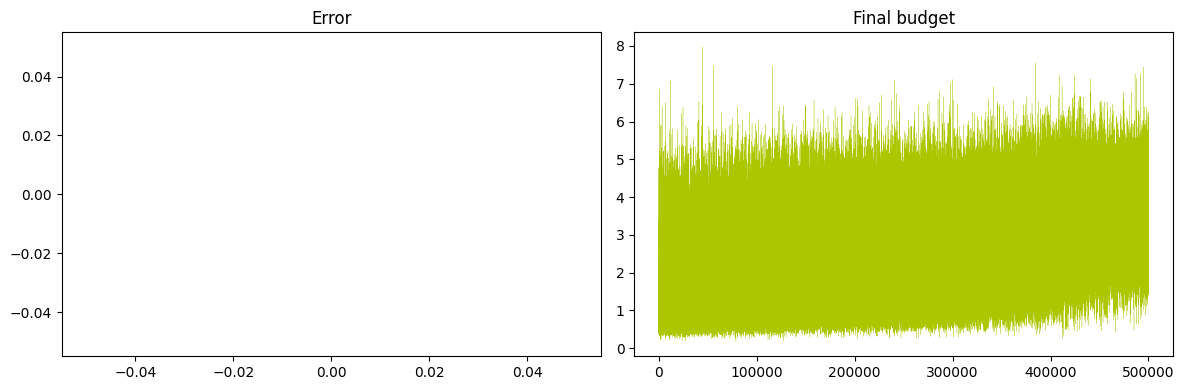

In [10]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2)
sns.lineplot(x=range(len(np.array(0).flatten())), y=np.array(0).flatten(), ax=ax[0], c='#acc700', linewidth=.2)
ax[0].set_title('Error')
sns.lineplot(x=range(len(final_budget_queue)), y=final_budget_queue, ax=ax[1], c='#acc700', linewidth=.2)
ax[1].set_title('Final budget')
plt.tight_layout()
plt.show()

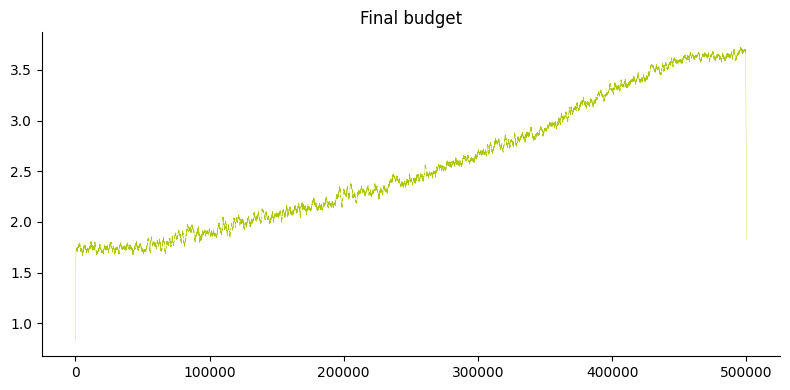

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=range(len(final_budgets)), y=final_budgets, ax=ax, c='#acc700', linewidth=.2)
ax.set_title('Final budget')

# Remove spines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [54]:
state, info = env.reset()
for _ in range(30):
    options = env.unwrapped.actions_available
    action = REINFORCE_agent.policy(state, greedy=True)
    
    s_prime, reward, terminated, truncated, info = env.step(action)
    print(f'Action: {action}', f'State: {state}', f'Reward: {round(reward,3)}', f'Terminated: {terminated}', truncated, info)

    if terminated or truncated:
        print(f'Final state: {s_prime}')
        print("============End of episode============")
        state, info = env.reset()
        break
    else:
        state = s_prime
env.close()

Action: 0 State: {'budget': 2, 'sheep_count': 0, 'bought_sheep_count': 0, 'sheep_reproduction_probability': 0.001641124840903045, 'year': 0} Reward: -0.0 Terminated: False False {}
Action: 0 State: {'budget': 1.001, 'sheep_count': 1, 'bought_sheep_count': 1, 'sheep_reproduction_probability': 0.001641124840903045, 'year': 1} Reward: -0.0 Terminated: False False {}
Action: 2 State: {'budget': 0.011999999999999891, 'sheep_count': 3, 'bought_sheep_count': 2, 'sheep_reproduction_probability': 1.0, 'year': 2} Reward: 0.0 Terminated: False False {}
Action: 1 State: {'budget': 0.03299999999999989, 'sheep_count': 3, 'bought_sheep_count': 2, 'sheep_reproduction_probability': 0.3628873693012115, 'year': 3} Reward: 0.0 Terminated: False False {}
Action: 1 State: {'budget': 0.0839999999999999, 'sheep_count': 4, 'bought_sheep_count': 2, 'sheep_reproduction_probability': 0.3628873693012115, 'year': 4} Reward: 0.0 Terminated: False False {}
Action: 1 State: {'budget': 0.1449999999999999, 'sheep_count'

Save model

In [83]:
experiment_folder = 's6-penalty2.5-edecay1-g0.999-storm0.6'
os.makedirs(f'agent_models/REINFORCENeuralAdvantage/{experiment_folder}', exist_ok=True)
torch.save(REINFORCE_agent.policy_net.state_dict(), f'agent_models/REINFORCENeuralAdvantage/{experiment_folder}/policy_net_weights-{int(n_episodes/1000)}k.pth')
torch.save(REINFORCE_agent.value_net.state_dict(), f'agent_models/REINFORCENeuralAdvantage/{experiment_folder}/value_net_weights-{int(n_episodes/1000)}k.pth')

Save data

In [84]:
os.makedirs(f'data/REINFORCENeuralAdvantage/{experiment_folder}', exist_ok=True)
np.save(f'data/REINFORCENeuralAdvantage/{experiment_folder}/final_budget_queue-{int(n_episodes/1000)}k.npy', np.array(final_budget_queue))

# Montecarlo VFA

In [ ]:
nenv = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
final_budget_queue = []
for episode in tqdm(range(n_episodes)):
    MC_vfa_agent.update(episode_number=episode)
    MC_vfa_agent.decay_epsilon()
    final_budget_queue.append(nenv.unwrapped.budget)

Statistics evaluation

In [ ]:
w = 1000
# rewards = conv(np.array(nenv.return_queue).flatten(), win=w)
# lengths = conv(np.array(nenv.length_queue).flatten(), win=w)
error = conv(np.array(MC_vfa_agent.training_error).flatten(), win=w)
final_budgets = conv(np.array(final_budget_queue), win=w)

In [ ]:
len(error), len(final_budgets)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2)
sns.lineplot(x=range(len(np.array(MC_vfa_agent.training_error).flatten())), y=np.array(MC_vfa_agent.training_error).flatten(), ax=ax[0], c='#acc700', linewidth=.2)
ax[0].set_title('Error')
sns.lineplot(x=range(len(final_budget_queue)), y=final_budget_queue, ax=ax[1], c='#acc700', linewidth=.2)
ax[1].set_title('Final budget')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2)
sns.lineplot(x=range(len(error)), y=error, ax=ax[0], c='#acc700', linewidth=.2)
ax[0].set_title('Error')
sns.lineplot(x=range(len(final_budgets)), y=final_budgets, ax=ax[1], c='#acc700', linewidth=.2)
ax[1].set_title('Final budget')
plt.tight_layout()
plt.show()

In [ ]:
MC_vfa_agent.w

In [ ]:
state, info = env.reset()
for _ in range(30):
    options = env.unwrapped.actions_available
    action = MC_vfa_agent.greedy_policy(state)
    
    s_prime, reward, terminated, truncated, info = env.step(action)
    print(f'Action: {action}', f'State: {state}', f'Reward: {round(reward,3)}', f'Terminated: {terminated}', truncated, info)

    if terminated or truncated:
        print(f'Final state: {s_prime}')
        print("============End of episode============")
        state, info = env.reset()
        break
    else:
        state = s_prime
env.close()

In [ ]:
experiment_folder = 'gaussian_delta-nowoolcost-15woolprice-200k'
os.makedirs(f'data/MCVFA/{experiment_folder}', exist_ok=True)

np.save(f'data/MCVFA/{experiment_folder}/weights.npy', MC_vfa_agent.w.detach().numpy())
np.save(f'data/MCVFA/{experiment_folder}/final_budget_queue.npy', np.array(final_budget_queue))
np.save(f'data/MCVFA/{experiment_folder}/training_error.npy', np.array(MC_vfa_agent.training_error).flatten())
# Split the 15M training error records in two chunks not to exceed GitHub limit of 100MB per file
# np.save('data/MCVFA/training_error_0k-750k.npy', MC_vfa_agent.training_error[: len(MC_vfa_agent.training_error) // 2])
# np.save('data/MCVFA/training_error_750k-1.5M.npy', MC_vfa_agent.training_error[len(MC_vfa_agent.training_error) // 2 : ])

# SARSA VFA

In [ ]:
nenv = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
final_budget_queue = []
for episode in tqdm(range(n_episodes)):
    state, info = nenv.reset()
    done = False
    while not done:
        action = SARSA_vfa_agent.policy(state)
        # print(action)
        s_prime, reward, terminated, truncated, info = nenv.step(action=action)
        # update
        SARSA_vfa_agent.update(state, action, reward, s_prime)
        done = terminated or truncated
        state = s_prime
    SARSA_vfa_agent.decay_epsilon()
    final_budget_queue.append(nenv.unwrapped.budget)

Statistics evaluation

In [ ]:
w = 100
rewards = conv(np.array(nenv.return_queue).flatten(), win=w)
lengths = conv(np.array(nenv.length_queue).flatten(), win=w)
error = conv(np.array(SARSA_vfa_agent.training_error).flatten(), win=w)
final_budgets = conv(np.array(final_budget_queue), win=w)

In [ ]:
len(rewards),len(lengths),len(SARSA_vfa_agent.training_error)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=4)
ax[0].plot(range(len(nenv.return_queue)), nenv.return_queue, c='#acc700', linewidth=.4)
ax[0].set_title('Reward (Average)')
ax[1].plot(range(len(nenv.length_queue)), nenv.length_queue, c='#acc700', linewidth=.8)
ax[1].set_title('Episode Length')
ax[2].plot(range(len(SARSA_vfa_agent.training_error)), SARSA_vfa_agent.training_error, c='#acc700', linewidth=.2)
ax[2].set_title('Error')
ax[3].plot(range(len(final_budget_queue)), final_budget_queue, c='#acc700', linewidth=.2)
ax[3].set_title('Final budget')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=4)
sns.lineplot(x=range(len(rewards)), y=rewards, ax=ax[0], c='#acc700', linewidth=.4)
ax[0].set_title('Reward (Average)')
sns.lineplot(x=range(len(lengths)), y=lengths, ax=ax[1], c='#acc700', linewidth=.4)
ax[1].set_title('Episode Length')
sns.lineplot(x=range(len(error)), y=error, ax=ax[2], c='#acc700', linewidth=.2)
ax[2].set_title('Error')
sns.lineplot(x=range(len(final_budgets)), y=final_budgets, ax=ax[3], c='#acc700', linewidth=.2)
ax[3].set_title('Final budget')
plt.tight_layout()
plt.show()

In [ ]:
SARSA_vfa_agent.w